# Separierte Faltung mit Gauß

In [189]:
#Imports
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

In [190]:
# Gaussformel
def gauss(n, sigma):
    return np.exp(-(n * n / (2 * sigma * sigma))) / np.sqrt(2 * np.pi * sigma * sigma)

In [191]:
# TODO: Ergebnis ist noch falsch
def create_convolution_kernel(sigma, precision):
    # k berechnen
    k = int (precision * sigma)
    # Array für Gausskern initialisieren
    kernel = np.zeros(2 * k + 1)
    # Gaussfunktion anwenden
    for n in range(-k,k+1):
        kernel[n + k] = gauss(n, sigma)
    
    # Summe aller Kernelemente auf 1 normieren
    sum = 0
    for i in range(len(kernel)):
        sum += kernel[i]
    kernel = kernel / sum

    # Debug: print kernel
    print(f"Kernel: {kernel}")
    return kernel

In [193]:
create_convolution_kernel(1, 2)
#np.array([1,4,6,4,1]) / sum(np.array([1,4,6,4,1]))

Kernel: [0.05448868 0.24420134 0.40261995 0.24420134 0.05448868]


array([0.05448868, 0.24420134, 0.40261995, 0.24420134, 0.05448868])

In [103]:
def convolute_1D(image_array, kernel, horizontal=1):
    # Array für die Faltung initialisieren
    convoluted_image_array = np.zeros_like(image_array)

    # Maße des Bildes bestimmen
    height, width = image_array.shape

    # Faltungsrichtung bestimmen (horizontal / vertikal)
    vertical = int(not(horizontal))

    # Padding: Wrap Border
    padding_width = int(len(kernel) / 2 + 1)
    padded_image_array = np.pad(image_array, padding_width, mode='wrap')

    # Faltung
    for x in range(width):
        for y in range(height):
            for k in range(len(kernel)):
                old_pixel = padded_image_array[padding_width + y - vertical * k][padding_width + x - horizontal * k]
                new_pixel = old_pixel * kernel[k]
                convoluted_image_array[y][x] += new_pixel

    return convoluted_image_array

Kernel: [0.06634167 0.07942539 0.09136095 0.10096946 0.10721307 0.10937892
 0.10721307 0.10096946 0.09136095 0.07942539 0.06634167]


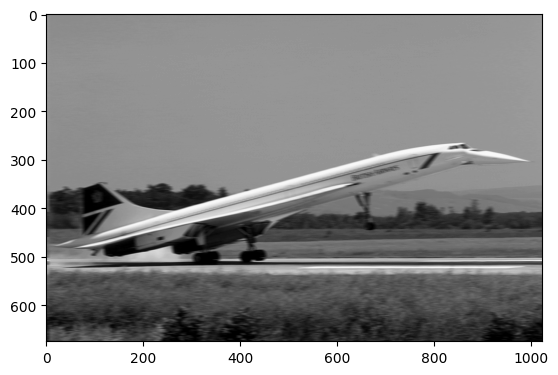

In [104]:
# Bild einlesen und in numpy-array umwandeln
image = Image.open("concorde.png")
image_array = np.array(image, dtype='uint8')

image_array = convolute_1D(image_array, create_convolution_kernel(5, 1))
plt.imshow(image_array, cmap='gray', vmin=0, vmax=256)

In [105]:
def convolute_seperated_2D(image_array, horizontal_kernel, vertical_kernel):
    horizontal_convoluted = convolute_1D(image_array, horizontal_kernel, 1)
    return convolute_1D(horizontal_convoluted, vertical_kernel, 0)

Kernel: [0.06634167 0.07942539 0.09136095 0.10096946 0.10721307 0.10937892
 0.10721307 0.10096946 0.09136095 0.07942539 0.06634167]


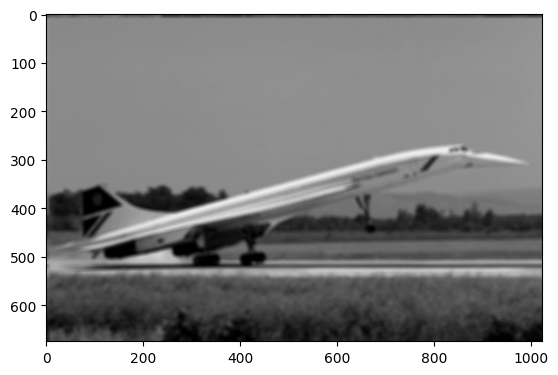

In [106]:
# Bild einlesen und in numpy-array umwandeln
image = Image.open("concorde.png")
image_array = np.array(image, dtype='uint8')

kernel = create_convolution_kernel(5, 1)
image_array = convolute_seperated_2D(image_array, kernel, kernel)
plt.imshow(image_array, cmap='gray', vmin=0, vmax=256)

In [157]:
def create_2D_convolution_kernel(sigma, precision):
    horizontal_kernel = create_convolution_kernel(sigma, precision)
    vertical_kernel = np.transpose(horizontal_kernel)
    # dyadisches Produkt
    kernel = np.outer(vertical_kernel, horizontal_kernel)
    # Summe aller Kernelemente auf 1 normieren
    sum = 0

    for i in range(len(kernel)):
        for j in range(len(kernel[0])):
            sum += kernel[i][j]
    kernel = kernel / sum 
    print(f"Kernel: {kernel}")
    return kernel

In [158]:
create_2D_convolution_kernel(0.75, 2.5)
hori = np.array([1,2,1])
verti = np.transpose(hori)

kernel = np.outer(verti, hori)
sum = 0

for i in range(len(kernel)):
    for j in range(len(kernel[0])):
        sum += kernel[i][j]
kernel / sum

Kernel: [0.22561011 0.54877978 0.22561011]
Kernel: [[0.05089992 0.12381027 0.05089992]
 [0.12381027 0.30115924 0.12381027]
 [0.05089992 0.12381027 0.05089992]]


array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [159]:
def convolute_2D(image_array, kernel):
    # Array für die Faltung initialisieren
    convoluted_image_array = np.zeros_like(image_array)

    # Maße des Bildes bestimmen
    height, width = image_array.shape

    # Padding: Wrap Border
    padding_width = int(len(kernel) / 2 + 1)
    padded_image_array = np.pad(image_array, padding_width, mode='wrap')

    # Faltung
    for x in range(width):
        for y in range(height):
            for k in range(len(kernel)):
                for l in range(len(kernel[0])):
                    old_pixel = padded_image_array[padding_width + y - int(k/2)][padding_width + x - int(l/2)]
                    new_pixel = old_pixel * kernel[l][k]
                    convoluted_image_array[y][x] += new_pixel

    return convoluted_image_array

Kernel: [0.06634167 0.07942539 0.09136095 0.10096946 0.10721307 0.10937892
 0.10721307 0.10096946 0.09136095 0.07942539 0.06634167]
Kernel: [[0.00440122 0.00526921 0.00606104 0.00669848 0.00711269 0.00725638
  0.00711269 0.00669848 0.00606104 0.00526921 0.00440122]
 [0.00526921 0.00630839 0.00725638 0.00801954 0.00851544 0.00868746
  0.00851544 0.00801954 0.00725638 0.00630839 0.00526921]
 [0.00606104 0.00725638 0.00834682 0.00922467 0.00979509 0.00999296
  0.00979509 0.00922467 0.00834682 0.00725638 0.00606104]
 [0.00669848 0.00801954 0.00922467 0.01019483 0.01082525 0.01104393
  0.01082525 0.01019483 0.00922467 0.00801954 0.00669848]
 [0.00711269 0.00851544 0.00979509 0.01082525 0.01149464 0.01172685
  0.01149464 0.01082525 0.00979509 0.00851544 0.00711269]
 [0.00725638 0.00868746 0.00999296 0.01104393 0.01172685 0.01196375
  0.01172685 0.01104393 0.00999296 0.00868746 0.00725638]
 [0.00711269 0.00851544 0.00979509 0.01082525 0.01149464 0.01172685
  0.01149464 0.01082525 0.00979509 0

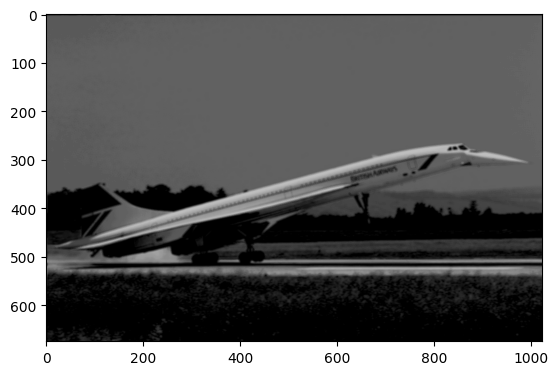

In [162]:
# Bild einlesen und in numpy-array umwandeln
image = Image.open("concorde.png")
image_array = np.array(image, dtype='uint8')

kernel = create_2D_convolution_kernel(5, 1)
image_array = convolute_2D(image_array, kernel)
plt.imshow(image_array, cmap='gray', vmin=0, vmax=256)